<a href="https://colab.research.google.com/github/zuritae98/proyectoDesercionEscolar/blob/main/ArbolDeDesiciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

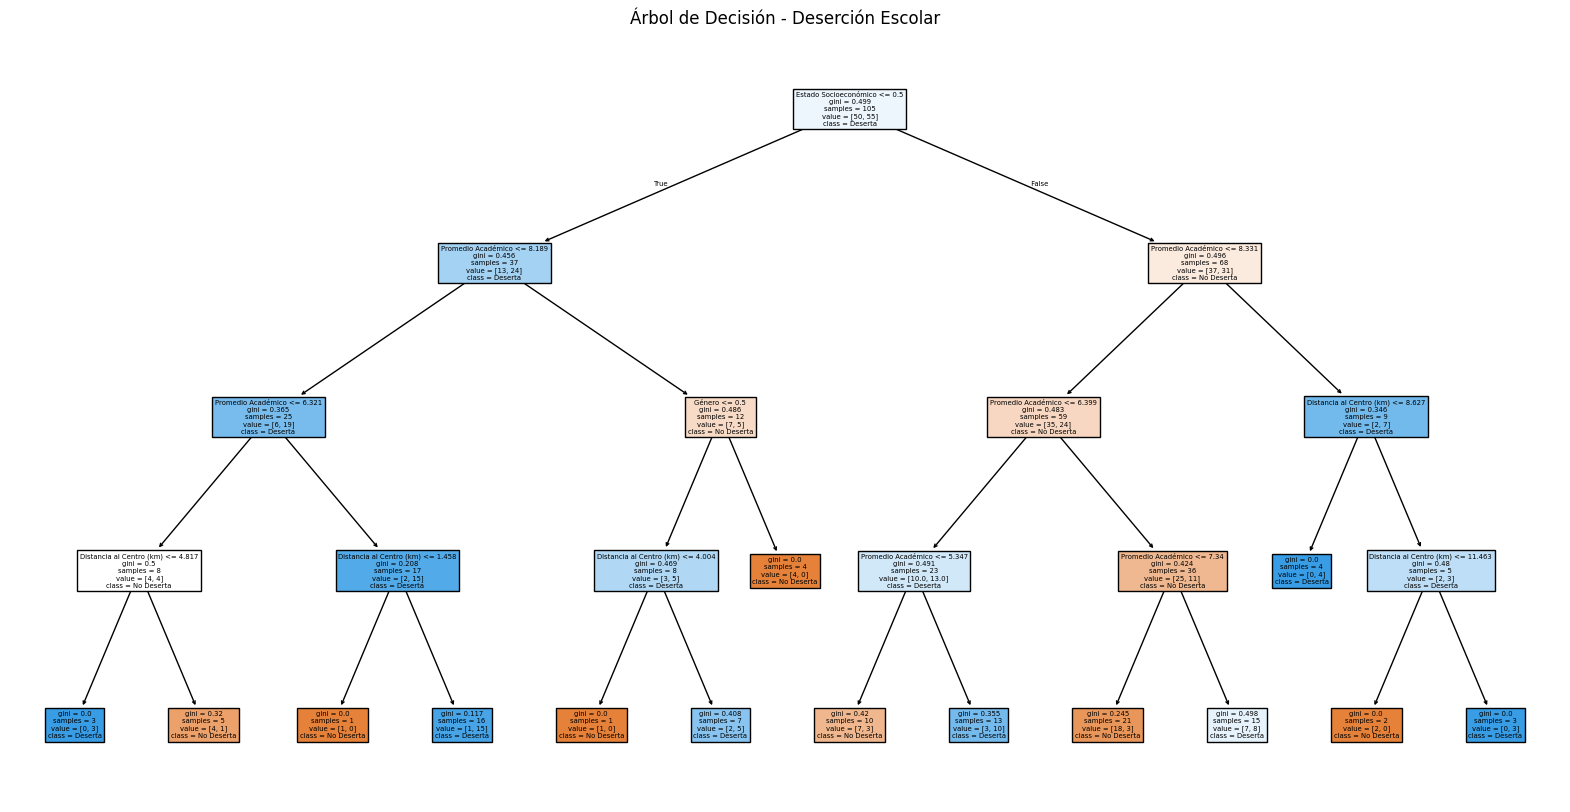

In [9]:
# Importar librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv('desercion_escolar_espana_150.csv')

# Paso 3: Codificar variables categóricas
mapeos = {
    'Género': {'Masculino': 0, 'Femenino': 1},
    'Estado Socioeconómico': {'Bajo': 0, 'Medio': 1, 'Alto': 2},
    'Situación Laboral': {'Desempleado': 0, 'Estudiante': 1, 'Trabajo parcial': 2, 'Ninguno': 3},
    'Nacionalidad Española': {'No': 0, 'Sí': 1},
    'Apoyo Familiar': {'Bajo': 0, 'Medio': 1, 'Alto': 2},
    '¿Deserta?': {'No': 0, 'Sí': 1}
}

df_encoded = df.copy()
for col, mapa in mapeos.items():
    df_encoded[col] = df_encoded[col].map(mapa)

# Separar características y variable objetivo
X = df_encoded.drop(columns=['¿Deserta?', 'ID'])
y = df_encoded['¿Deserta?']

#Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Entrenar árbol de decisión
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

# Visualizar el árbol
plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=X.columns, class_names=['No Deserta', 'Deserta'], filled=True)
plt.title('Árbol de Decisión - Deserción Escolar')
plt.show()